In [1]:
from google.colab import files
a = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv


# Import Necessary library

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [3]:
data = pd.read_csv("Corona_NLP_test.csv")
data["Sentiment"] = LabelEncoder().fit_transform(data['Sentiment'])
data = data.dropna(axis=1)
data.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,1,44953,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...,4
2,3,44955,02-03-2020,Find out how you can protect yourself and love...,1
3,4,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,2
4,5,44957,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [4]:
data["OriginalTweet"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [5]:
data.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [6]:
data.shape

(3798, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   TweetAt        3798 non-null   object
 3   OriginalTweet  3798 non-null   object
 4   Sentiment      3798 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 148.5+ KB


In [8]:
x = data.drop('Sentiment',axis=1)
y = data['Sentiment'].values
y=y.reshape(-1,1)
y

array([[0],
       [4],
       [1],
       ...,
       [3],
       [0],
       [1]])

In [9]:
nltk.download('stopwords')
message = x.copy()
message.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
ps = PorterStemmer()
corpus=[]
for i in range(len(x)):
  review=re.sub('[^a-zA-Z]',' ',message['OriginalTweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
corpus[0]

'trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold onlin grocer foodkick maxdeliveri coronaviru fear shopper stock http co gr pcrlwh http co ivmkmsqdt'

In [11]:
voc_size = 50000
one_hot_r = [one_hot(word,voc_size) for word in corpus]

one_hot_r[0]

[36785,
 196,
 9065,
 17158,
 3426,
 16414,
 9575,
 18486,
 1331,
 33190,
 6945,
 1097,
 29901,
 38920,
 15359,
 23032,
 43377,
 38317,
 2095,
 45340,
 13478,
 26521,
 43304,
 45340,
 13478,
 8723]

In [13]:
sent_length = 30
input = pad_sequences(one_hot_r,padding='pre',maxlen=sent_length)

In [15]:
final_input = np.array(input)
final_output = np.array(y)

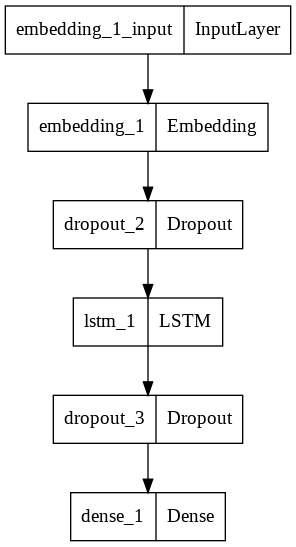

In [19]:
dim = 40
model = Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(80))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
plot_model(model)

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(final_input,final_output, test_size=0.33, random_state=42)

In [25]:
model.fit(x_train,y_train,batch_size=50,epochs=120,validation_data=(x_test,y_test))

y_pred = model.predict_classes(x_test)

Epoch 1/120
51/51 [==============================] - 6s 66ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 2/120
51/51 [==============================] - 3s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 3/120
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 4/120
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 5/120
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 6/120
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 7/120
51/51 [==============================] - 3s 52ms/step - loss: 0.0000e+00 - accuracy: 0.1

AttributeError: ignored

In [27]:
y_pred = model.predict(x_test)

In [28]:
val = metrics.accuracy_score(y_test,y_pred)
print('accuracy is =',str(val*100)+" %")

accuracy is = 16.905901116427433 %
